In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('yulu_rental.csv')

1. Хочу дослідити чи впливає час на кількість поїздок

In [3]:
df.datetime = pd.to_datetime(df.datetime)

In [4]:
df['hour'] = df['datetime'].dt.hour # створюю новий стовбець, який буде містити тільки години

In [20]:
df_hour = df[['hour', 'count']].groupby('hour').sum().reset_index()
df_hour.head()

,hour,count
0,0,25088
1,1,15372
2,2,10259
3,3,5091
4,4,2832


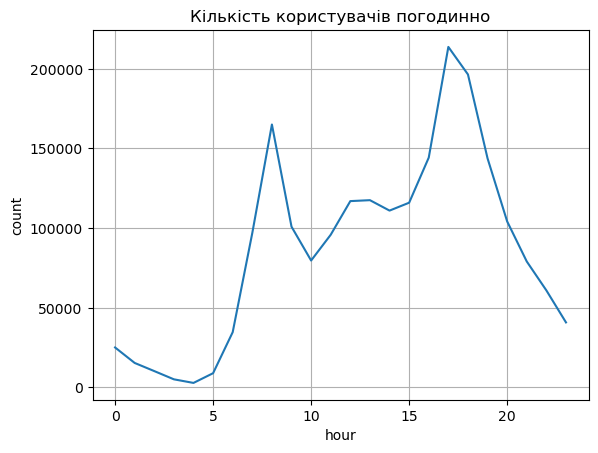

In [45]:
plt.plot(df_hour['hour'],df_hour['count'])
plt.title('Кількість користувачів погодинно')
plt.xlabel('hour')
plt.ylabel('count')
plt.grid(True);

На графіку видно пікові години використання вранці - це 8 год., та ввечері - 17-18 год. Отже в цей час мають бути заряджені та справні максимально можлива кількіть електровелосипедів. Також можна визначити оптимальний час для тех.обслуговування, наприклад, 5-6 год та після 20 год. 

2. Хочу дослідити чи впливає швидкість вітру на те, як відчувається температура у розрізі різних пір року 

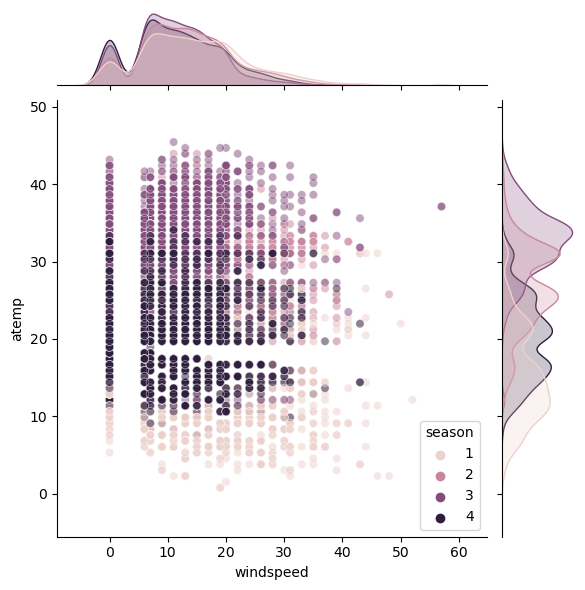

In [46]:
sns.jointplot(data=df, x="windspeed", y="atemp", hue="season", alpha=.5);

З отриманого графіка не видно впливу швидкості вітру на те, як відчувається температура

In [ ]:
3. Хочу побачити чи впливає сезонність на кількість поїздок уже зареєстрованих користувачів

In [47]:
df_season = df[['season', 'registered']]

In [48]:
df_season.head()

,season,registered
0,1,13
1,1,32
2,1,27
3,1,10
4,1,1


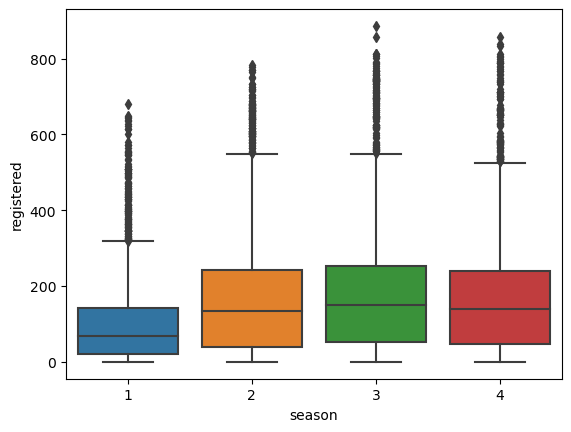

In [49]:
sns.boxplot(data=df_season, x='season', y='registered');

Цікаво, що графіки літо-осінь-зима майже співпадають. Отже зареєстровані клієнти систематично користуються електроелосипедами в ці періоди. Лише весною кількіть поїздок зменшується. для вияснення цієї тенденції потрібно провести додатковий аналіз даних.